In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('my_movies.csv')
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
drop_columns = ['V1', 'V2', 'V3', 'V4', 'V5']
for i in drop_columns:
    data = data.drop(i, axis = 1)
data.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [5]:
data.shape

(10, 10)

In [6]:
a = []
for i in data.columns:
    a.append({'Movies': i, 'Count': data[i].value_counts()[1]})
a = pd.DataFrame(a)
a

,Movies,Count
0,Sixth Sense,6
1,Gladiator,7
2,LOTR1,2
3,Harry Potter1,2
4,Patriot,6
5,LOTR2,2
6,Harry Potter2,1
7,LOTR,1
8,Braveheart,1
9,Green Mile,2


##### plotting counts of each Movies

<BarContainer object of 10 artists>

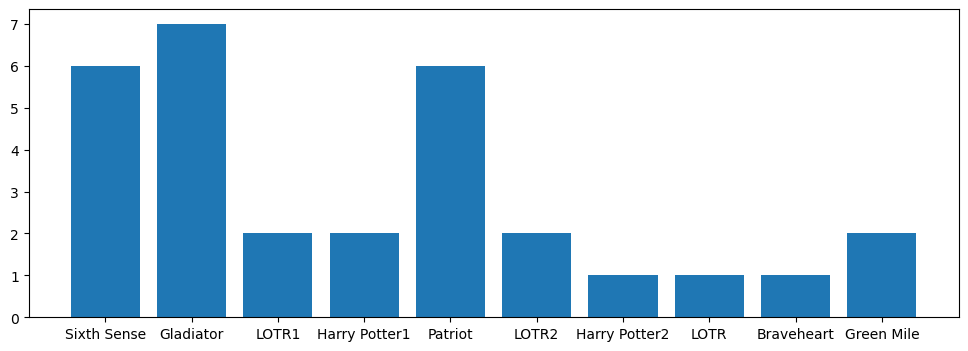

In [7]:
plt.figure(figsize = (12, 4))
plt.bar(a['Movies'], a['Count'])

In [8]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

##### finding which movies are watched together
##### 1. Association rules with 10% Support and 70% confidence

In [9]:
frequent_itemsets = apriori(data, min_support = 0.1, use_colnames=True)
print(frequent_itemsets)

    support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Sixth Sense, Harry Potter1)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (Sixth Sense,

C:\Users\vinodh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [10]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.7)
print(rules)

         antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2      (Sixth Sense)                                          (LOTR1)   
3            (LOTR1)                                    (Sixth Sense)   
4      (Sixth Sense)                                  (Harry Potter1)   
..               ...                                              ...   
245  (Harry Potter1)          (Sixth Sense, LOTR2, LOTR1, Green Mile)   
246     (Green Mile)       (Sixth Sense, LOTR2, LOTR1, Harry Potter1)   
247    (Sixth Sense)        (LOTR2, LOTR1, Green Mile, Harry Potter1)   
248          (LOTR1)  (Sixth Sense, LOTR2, Green Mile, Harry Potter1)   
249          (LOTR2)  (Sixth Sense, LOTR1, Green Mile, Harry Potter1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7  

In [11]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
212,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
226,"(LOTR1, Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
159,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
158,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
182,"(Sixth Sense, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
67,(Sixth Sense),"(LOTR2, LOTR1)",0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960000,-0.333333
21,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333
53,"(Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333
56,(Gladiator),"(Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429


<AxesSubplot:>

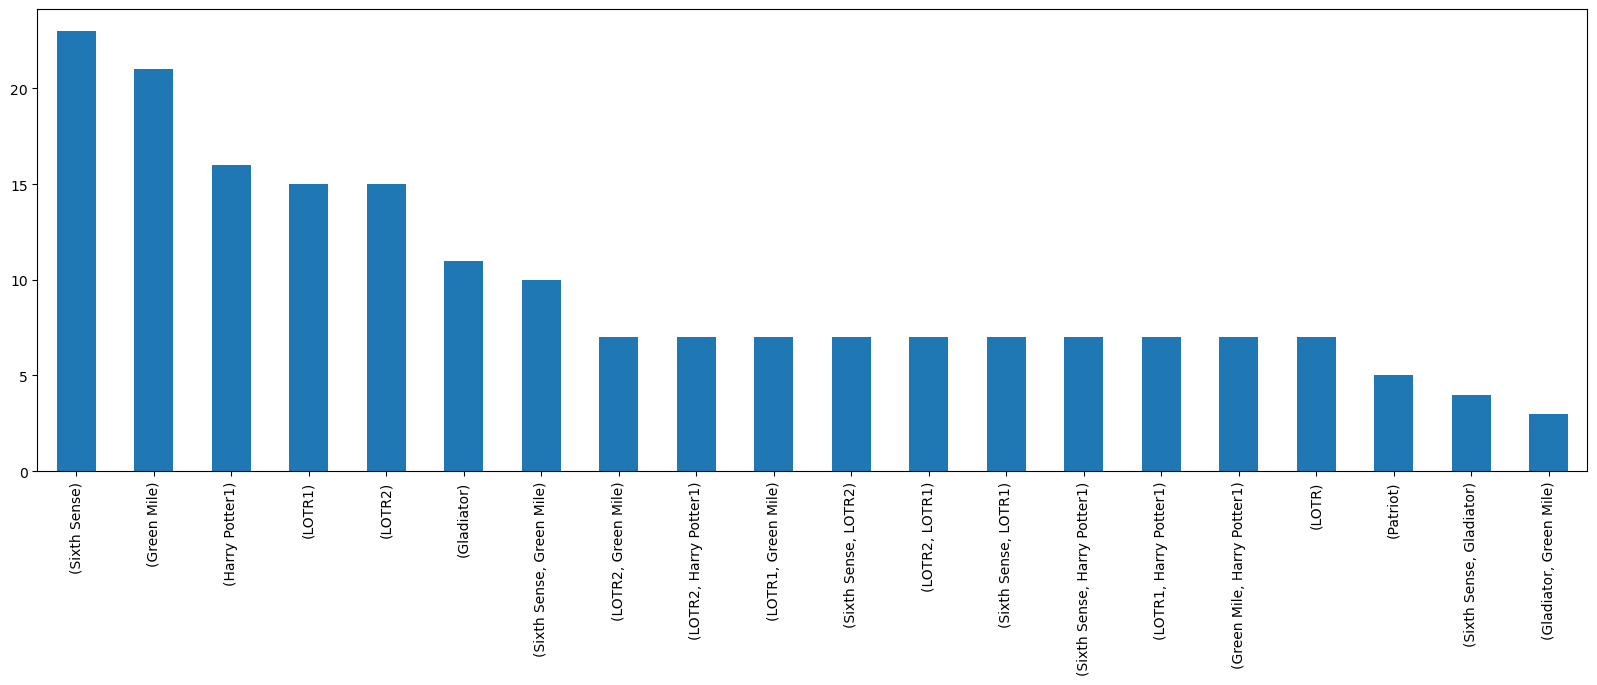

In [12]:
plt.figure(figsize=(20, 6))
pd.Series(rules['consequents']).value_counts().head(20).plot.bar()

<AxesSubplot:xlabel='support', ylabel='confidence'>

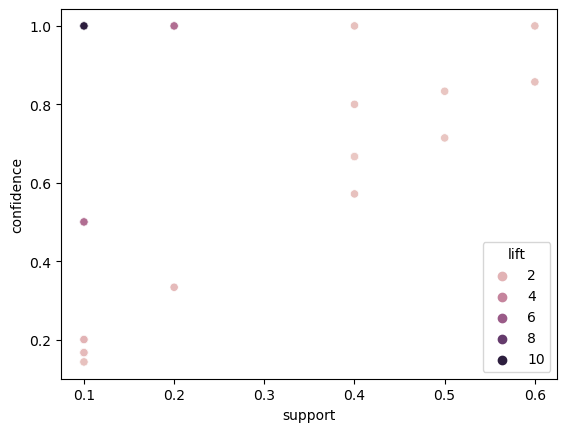

In [13]:
conf = rules['confidence']
supp = rules['support']
sns.scatterplot(supp, conf, hue = rules['lift'])

#### 2. Association rules with 15% Support and 80% confidence

In [14]:
frequent_itemsets = apriori(data, min_support = 0.15, use_colnames=True)
print(frequent_itemsets)

    support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Patriot, Sixth Sense)
9       0.2          (Sixth Sense, Green Mile)
10      0.6               (Patriot, Gladiator)
11      0.2                     (LOTR2, LOTR1)
12      0.4  (Patriot, Sixth Sense, Gladiator)


C:\Users\vinodh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.8)
print(rules)

                 antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4              (Sixth Sense)              (Green Mile)                 0.6   
5               (Green Mile)             (Sixth Sense)                 0.2   
6                  (Patriot)               (Gladiator)                 0.6   
7                (Gladiator)                 (Patriot)                 0.7   
8                    (LOTR2)                   (LOTR1)                 0.2   
9                    (LOTR1)                   (LOTR2)                 0.2   
10    (Patriot, Sixth Sense)               (Gladiator)                 0.4   
11      (Patriot, Gladiator)             (Sixth Sense)          

In [16]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
15,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
12,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
13,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


<AxesSubplot:>

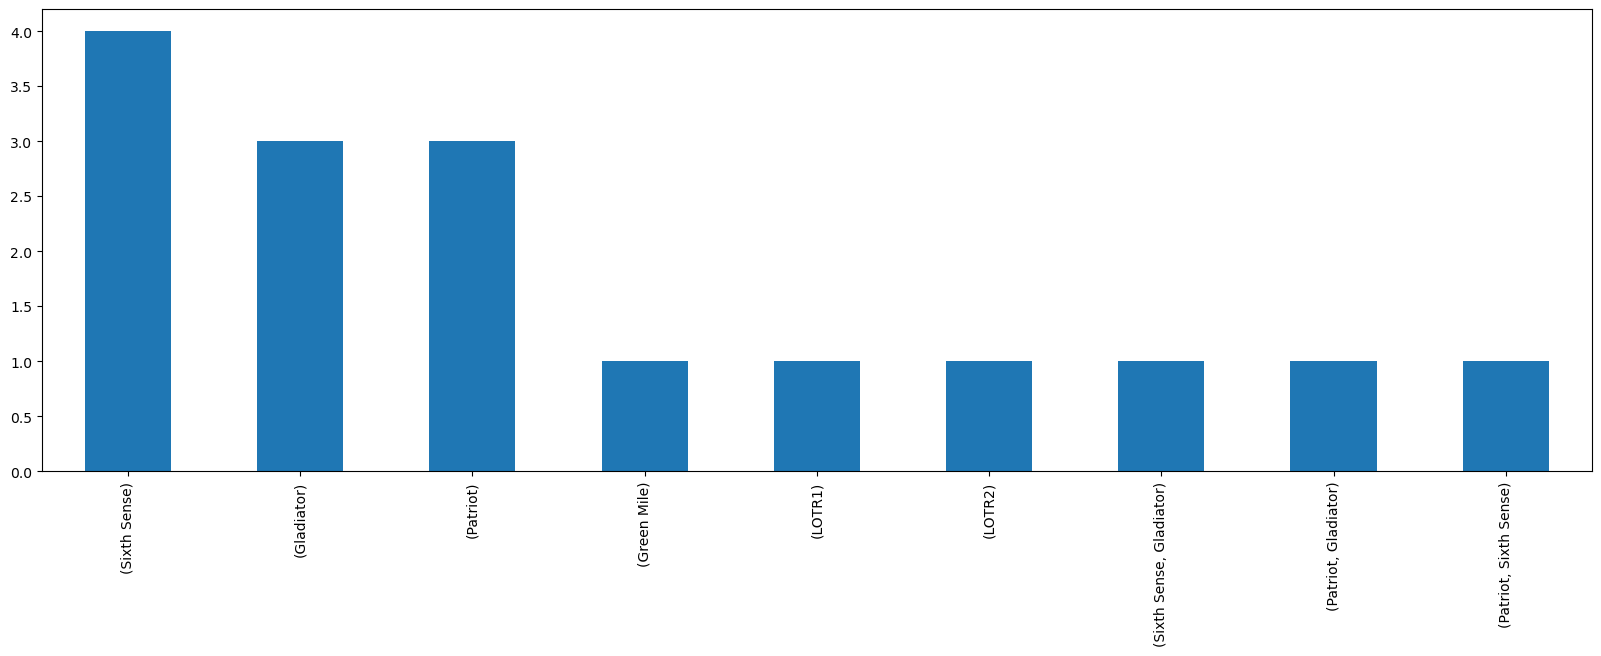

In [17]:
plt.figure(figsize=(20, 6))
pd.Series(rules['consequents']).value_counts().head(20).plot.bar()

In [18]:
conf = rules['confidence']
supp = rules['support']

<AxesSubplot:xlabel='support', ylabel='confidence'>

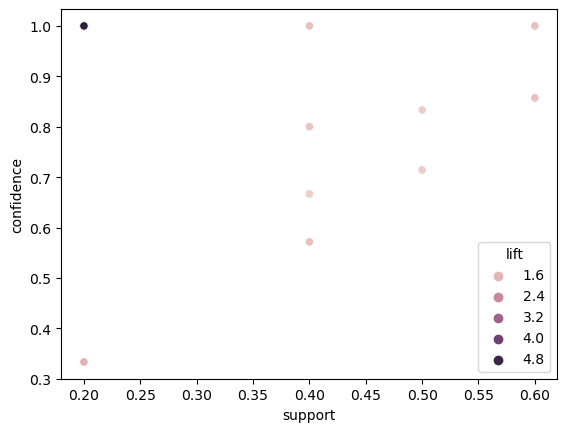

In [19]:
sns.scatterplot(supp, conf, hue = rules['lift'])

##### from above we can see by increasing the min_support value, frequency of books bought
##### together are getting reduced
So, Setting Min_support as 10% and frequency as 50%

In [20]:
frequent_itemsets = apriori(data, min_support = 0.1, use_colnames=True)
print(frequent_itemsets)

    support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Sixth Sense, Harry Potter1)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (Sixth Sense,

C:\Users\vinodh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [21]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.5)
print(rules)

         antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2      (Sixth Sense)                                          (LOTR1)   
3            (LOTR1)                                    (Sixth Sense)   
4      (Sixth Sense)                                  (Harry Potter1)   
..               ...                                              ...   
245  (Harry Potter1)          (Sixth Sense, LOTR2, LOTR1, Green Mile)   
246     (Green Mile)       (Sixth Sense, LOTR2, LOTR1, Harry Potter1)   
247    (Sixth Sense)        (LOTR2, LOTR1, Green Mile, Harry Potter1)   
248          (LOTR1)  (Sixth Sense, LOTR2, Green Mile, Harry Potter1)   
249          (LOTR2)  (Sixth Sense, LOTR1, Green Mile, Harry Potter1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7  

In [22]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
212,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
226,"(LOTR1, Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
159,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
158,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
182,"(Sixth Sense, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
67,(Sixth Sense),"(LOTR2, LOTR1)",0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960000,-0.333333
21,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333
53,"(Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333
56,(Gladiator),"(Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429


<AxesSubplot:>

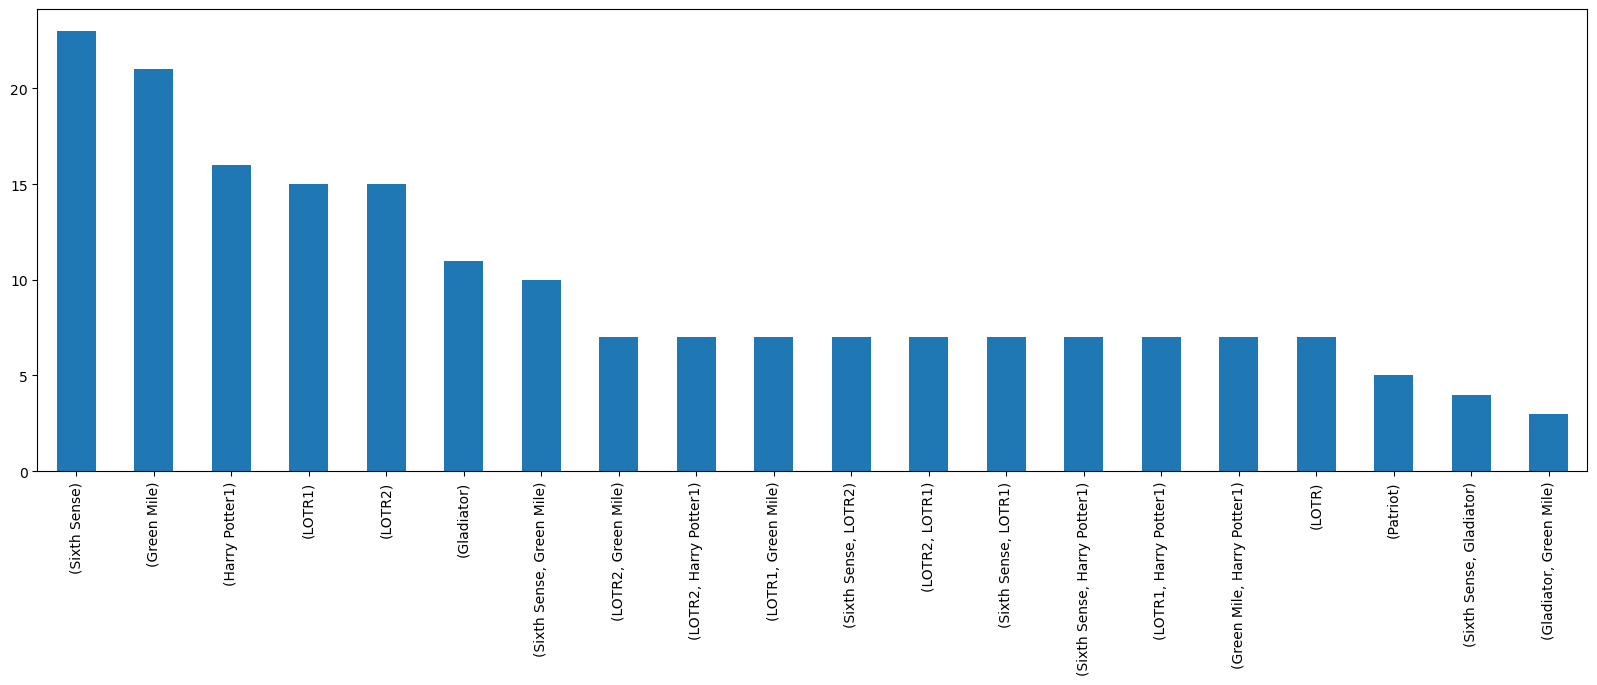

In [23]:
plt.figure(figsize=(20, 6))
pd.Series(rules['consequents']).value_counts().head(20).plot.bar()

<AxesSubplot:xlabel='support', ylabel='confidence'>

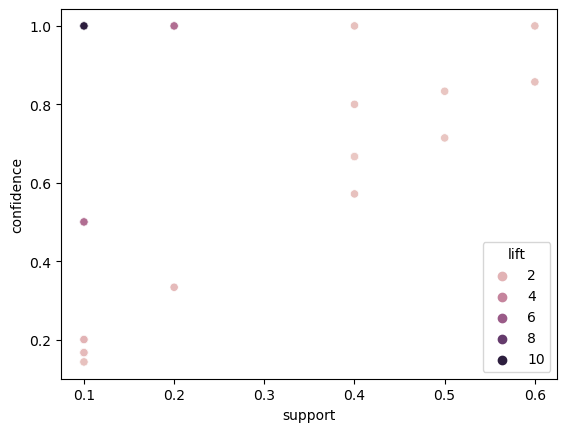

In [24]:
conf = rules['confidence']
supp = rules['support']
sns.scatterplot(supp, conf, hue = rules['lift'])